In [10]:
from QuICT.core import Circuit
from QuICT.core.gate import *

from QuICT.core.noise import *
from QuICT.simulation.density_matrix import DensityMatrixSimulation

In [11]:
# Build Pauli Error
bit_flip = BitflipError(0.05)
phase_flip = PhaseflipError(0.05)
print(bit_flip)
print(phase_flip)

# Build Depolarizing Error
dpe = DepolarizingError(0.05, 1)
print(dpe)

# Build Damping Error
amp_damping = DampingError(
    amplitude_prob=0.01,
    phase_prob = 0,
    dissipation_state = 0
)
phase_damping = DampingError(0, 0.3, 0)
ampphase_damping = DampingError(0.1, 0.3, 0.5)
print(amp_damping)
print(phase_damping)
print(ampphase_damping)

Pauli Channel with 1 qubits.
Noise with probability 0.95: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Noise with probability 0.05: [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Pauli Channel with 1 qubits.
Noise with probability 0.95: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Noise with probability 0.05: [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Depolarizing Channel with 1 qubits.
Noise with probability 0.9625: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Noise with probability 0.0125: [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Noise with probability 0.0125: [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
Noise with probability 0.0125: [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Damping Channel with 1 qubit
amplitude damping prob: 0.01 
Damping Channel with 1 qubit
phase damping prob: 0.3 
Damping Channel with 1 qubit
amplitude damping prob: 0.1 phase damping prob: 0.3 prob of stable state: 0.5


In [12]:
# Build noise model
model = NoiseModel()
model.add(dpe, ['x', 'y', 'z'])
model.add(amp_damping, ['u1'], [1])
model.add_noise_for_all_qubits(bit_flip, ['h'])
print(model)

Noise Model:
Basic Gates: ['h', 's', 'sdg', 'x', 'y', 'z', 'sx', 'sy', 'sw', 'id', 'u1', 'u2', 'u3', 'rx', 'ry', 'rz', 't', 'tdg', 'phase', 'cz', 'cx', 'cy', 'ch', 'crz', 'cu1', 'cu3', 'fsim', 'Rxx', 'Ryy', 'Rzz', 'swap', 'cswap', 'ccx', 'ccz', 'CCRz', 'measure', 'reset', 'barrier', 'unitary', 'perm', 'perm_fx', 'qft', 'iqft']
Noise Errors:
Gates with all qubits: {'y', 'x', 'z'}
Gates with specified qubits:[qubits: [1], gates: ['u1']] 


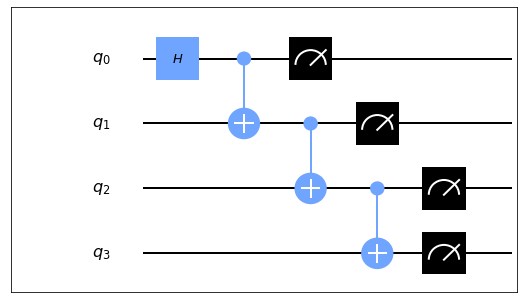

In [13]:
# Build Test Example
cir = Circuit(4)
H | cir(0)
for i in range(3):
    CX | cir([i, i+1])
Measure | cir
cir.draw()

In [14]:
import matplotlib.pyplot as plt

def plot_hist(data):
    plt.hist(x=data, bins="auto", alpha=0.9, rwidth=0.85)

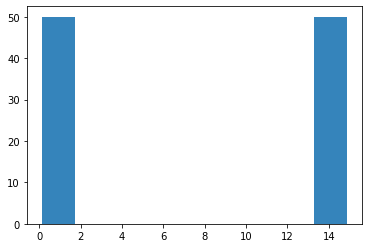

In [15]:
# Density Matrix Simulate normal circuit
dm_sim = DensityMatrixSimulation()
counts = []
for _ in range(100):
    state = dm_sim.run(cir)
    res = int(cir.qubits)
    counts.append(res)

plot_hist(counts)

In [16]:
# add noise for CX
BF_2bits = bit_flip.tensor(bit_flip)
model.add(BF_2bits, ['cx'])
print(BF_2bits)

Unitary Channel with 2 qubits.
Noise with probability 0.9025: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Noise with probability 0.0475: [[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
Noise with probability 0.0475: [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
Noise with probability 0.0025000000000000005: [[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]



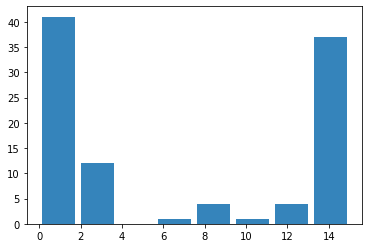

In [18]:
# simulate noise circuit
counts = []
for _ in range(100):
    state = dm_sim.run(cir, model)
    res = int(cir.qubits)
    counts.append(res)

plot_hist(counts)